# Домашнее задание «Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок»

In [3]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import scipy as sp


1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией (stddev) σ^2 = 225 и уровнем доверия β = 0.95.

In [4]:
# β = 1 − α # формула уровня доверия, те вероятность принять неправильную нулевую гипотезу
# α = 1 − β # уровень значимости (обычно 5%), те вероятность отвергнуть правильную нулевую гипотезу (вероятность ошибки первого рода).
# p-value - минимальное значение уровня значимости, при котором мы отвергаем нулевую гипотезу
# если p-value < α - то результат является статистически значимым и можно отклонить нулевую гипотезу

Z = 1.96  # 95%
sigma = 15 # стандартное отклонение
e = 3

N = ((sigma*Z)/e)**2
N

96.03999999999998

2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001


In [13]:
np.random.seed(12)
population_men = stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

In [14]:
t , p  = stats.ttest_ind(population_men,population_women)
print("t = " + str(t))
print("p = " + str(p))

t = 4.454139905689355
p = 8.423099227697255e-06


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

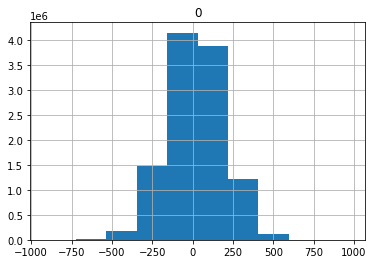

In [15]:
pd.DataFrame(population_men).hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

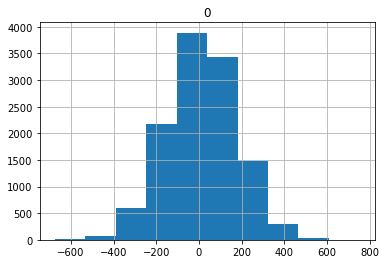

In [16]:
pd.DataFrame(population_women).hist()

3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [17]:
sigma = 150
Z = 1.96  # 95%
e = 3

In [18]:
N = ((sigma*Z)/e)**2
N

9604.0

4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, 
если уровнь значимости принять за 0.05 ?

 - Нулевая гипотеза - волшебник умеет предсказывать погоду.
 - Альтернативная - неумеет

In [19]:
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [23]:
oddsratio, pvalue = sp.stats.fisher_exact(observations)  
pvalue

0.08323639416753109

Вывод: значение pvalue больше уровня значимости, это значит мы не может отклонить нулевую гипотезу тк результат статистически не значим и мы не можем утверждать что волшебник действительно может предсказывать погоду.

5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]

In [30]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h#,h

In [31]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [33]:
mean_confidence_interval(data, 0.90)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [34]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [35]:
stats.ttest_ind(data_1,data_2)

Ttest_indResult(statistic=7.35744682757447, pvalue=2.1159475572725764e-11)

По t-тесту Стьюдента мы получили достаточно высокое значение pvalue (> 0.05), соответственно отвергаем нулевую гипотезу, что означает две данные выборки не принадлежат одному множеству.

7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

Предположим, Вы сформировали две гипотезы:
Нулевая гипотеза - распределение нормальное, 
Альтернативная гипотеза - распределение не нормальное.


Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03.
Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

Вывод: При pvalue = 0.03, что меньше уровня значимости, будем считать, что результат статистически значим и можно отклонить нулевую гипотезу и переменная имеет не нормальное распределение.

8. Первая выборка — это пациенты, которых лечили препаратом А. 
Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы? 

In [37]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

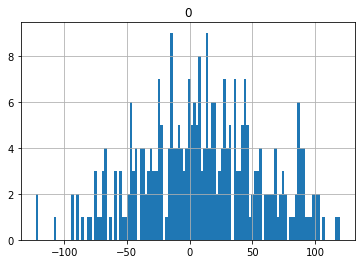

In [38]:
pd.DataFrame(A).hist(bins=120)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

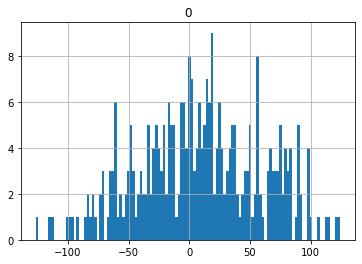

In [39]:
pd.DataFrame(B).hist(bins=120)

In [40]:
stats.ttest_ind(a=A,b=B,equal_var=False)

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)

a) Значение pvalue выше уровня значимости - мы не можем отклонить нулевую гипотезу, различия статистически не значимы либо случайны


b) При любом значении pvalue меньше 0.05 различия считались бы статистически значимыми